In [1]:
import sys
import networkx as nx
import pickle
import itertools as it

import warnings
warnings.filterwarnings(action='once')


if '/home/anna/Documents/cinnabar' not in sys.path:
    sys.path.insert(1, '/home/anna/Documents/cinnabar')
import cinnabar

if '/home/anna/BioSimSpace/python' not in sys.path:
    sys.path.insert(1, '/home/anna/BioSimSpace/python')
import BioSimSpace as BSS

print(cinnabar.__file__)
print(BSS.__file__)

try:
    import pipeline
except:
    print("adding code to the pythonpath...")
    code = '/home/anna/Documents/code/python'
    if code not in sys.path:
        sys.path.insert(1, code)
    import pipeline

from pipeline import *
from pipeline.analysis import *
from pipeline.prep import *


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
/home/anna/BioSimSpace/python/BioSimSpace/Parameters/Protocol/_protocol.py:51: ResourceWarning: unclosed file <_io.TextIOWrapper name='/dev/null' mode='w' encoding='UTF-8'>
  _sys.stderr = _sys.__stderr__
/home/anna/BioSimSpace/python/BioSimSpace/Parameters/Protocol/_openforcefield.py:88: ResourceWarning: unclosed file <_io.TextIOWrapper name='/dev/null' mode='w' encoding='UTF-8'>
  _sys.stderr = _sys.__stderr__


/home/anna/Documents/cinnabar/cinnabar/__init__.py
/home/anna/BioSimSpace/python/BioSimSpace/__init__.py
adding code to the pythonpath...


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f1f1b1f8460>


In [2]:
res_dir = "/home/anna/Documents/benchmark/tyk2_benchmark/outputs"
res_obj = analysis_network(res_dir,
                            exp_file="/home/anna/Documents/benchmark/inputs/experimental/tyk2.yml",
                            net_file="/home/anna/Documents/benchmark/tyk2_benchmark/execution_model/network_lomap.dat")
res_obj.compute()
print("done")

no output folder provided, writing all output to the 'results_directory'.
done



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



['lig_ejm48', 'lig_jmc28', 'lig_ejm44']

Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



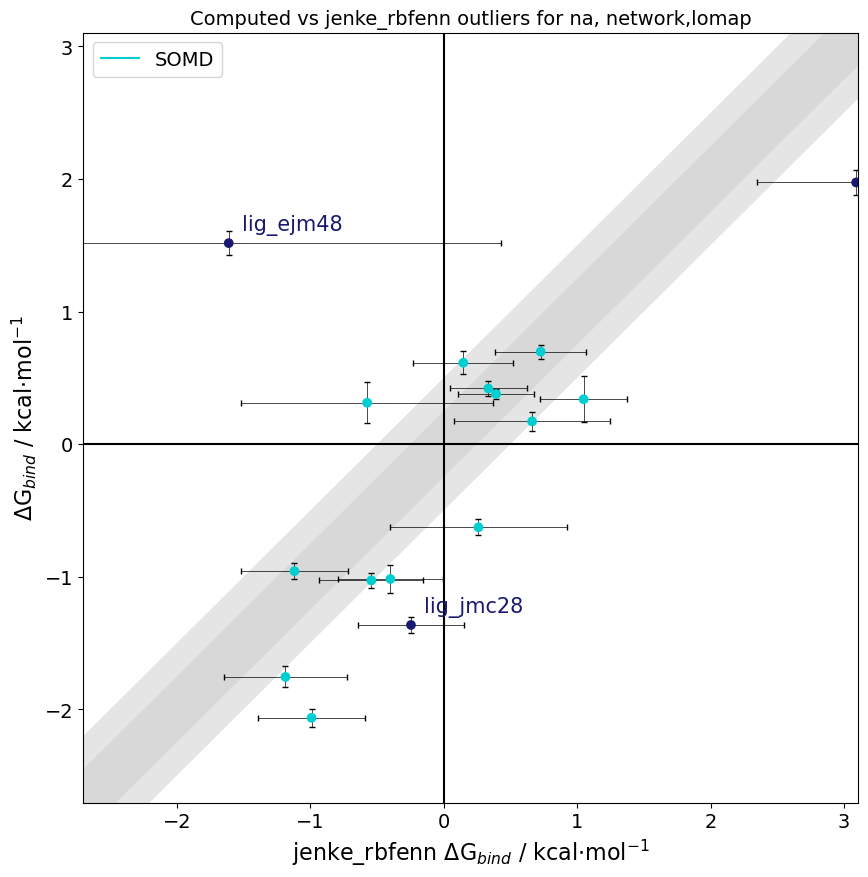

In [3]:
res_obj.compute_other_results("/home/anna/Documents/benchmark/inputs/other_computed/fep_data_tyk2_rbfenn_jenke.csv", name="jenke_rbfenn")
res_obj.plot_other_results(name="jenke_rbfenn", engine="SOMD", pert_val="val", outliers=3)

In [3]:
res_obj.calc_mae(pert_val="pert")

(            AMBER   GROMACS      SOMD
 AMBER         0.0  1.406554  0.645045
 GROMACS  1.406554       0.0  1.611455
 SOMD     0.645045  1.611455       0.0,
             AMBER   GROMACS      SOMD
 AMBER         0.0  0.248123  0.144357
 GROMACS  0.244171       0.0   0.23257
 SOMD     0.144572  0.233962       0.0)

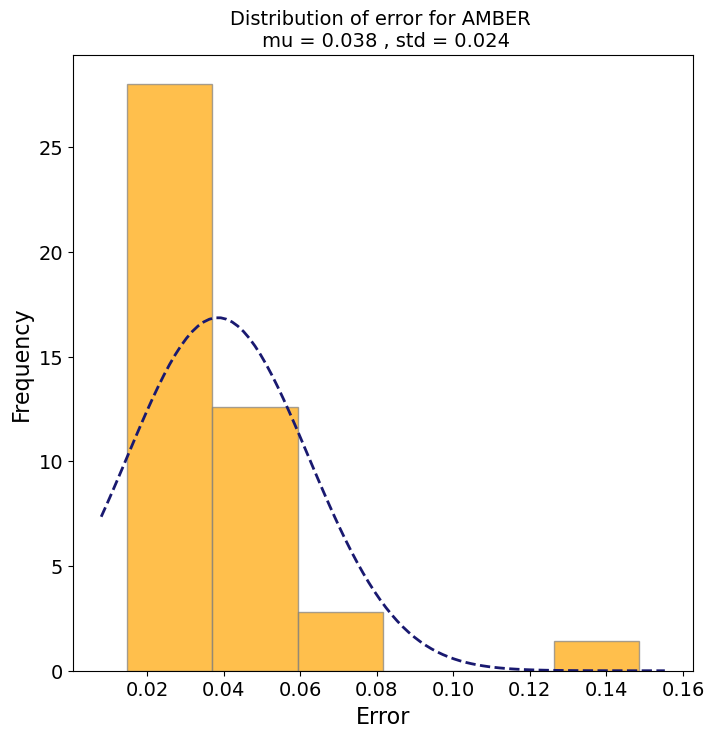

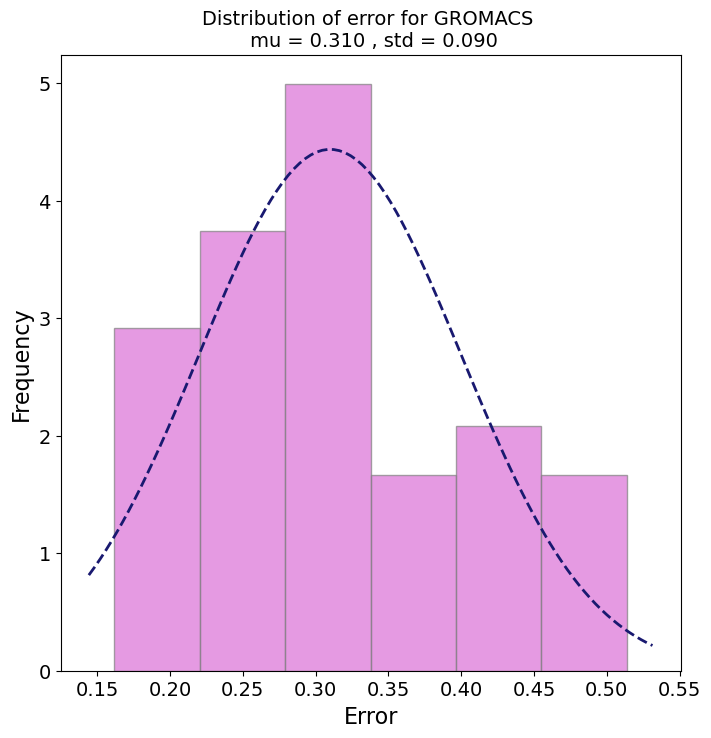

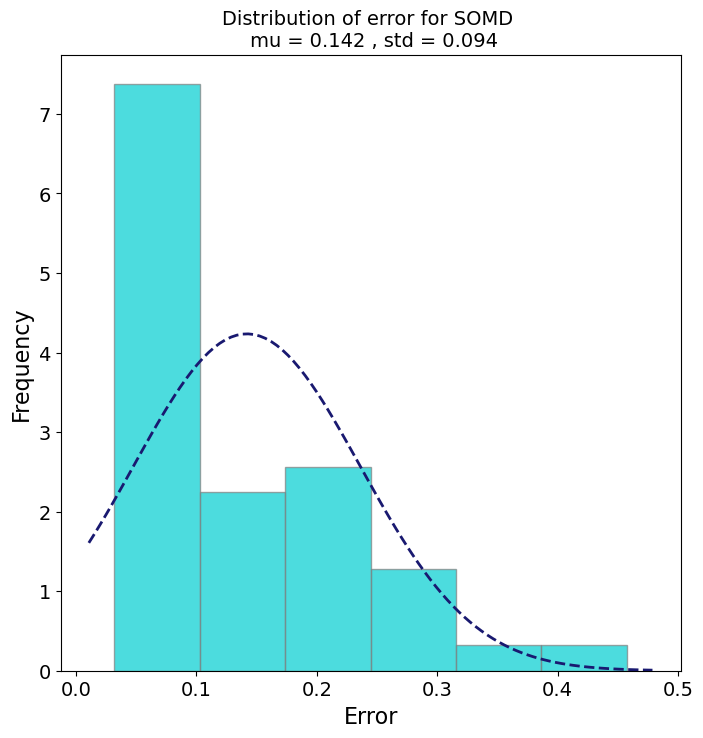

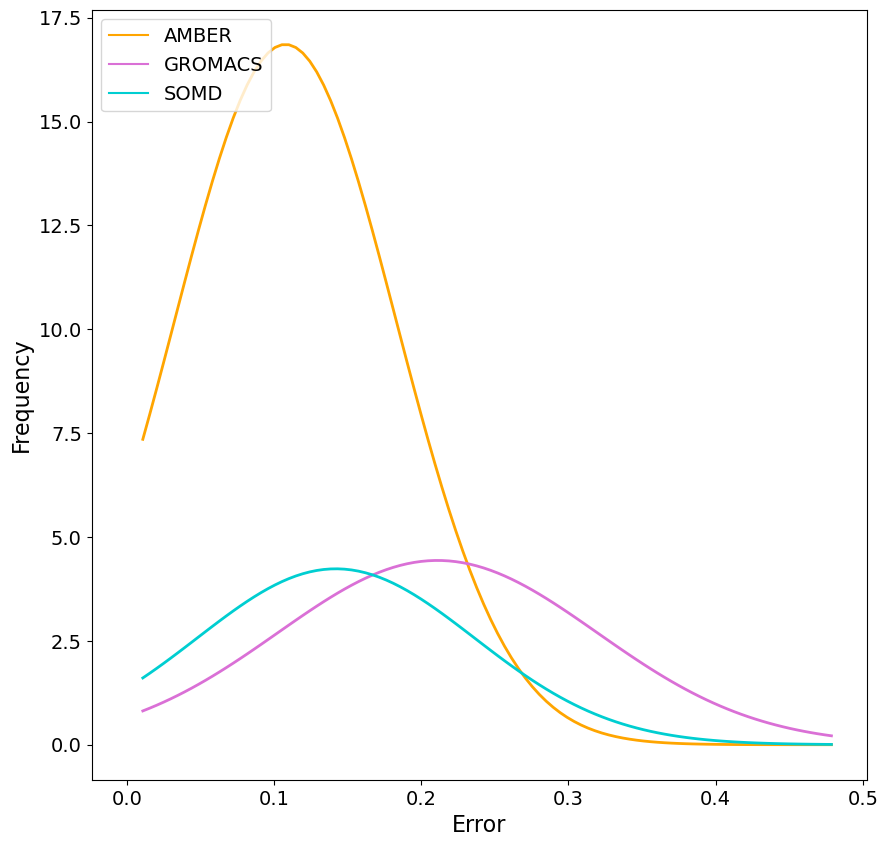

In [5]:
res_obj.plot_histogram_pert()

In [13]:
plot_ana = plotting_engines(res_obj, res_folder="/home/anna/Documents/code/test/results")

In [34]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

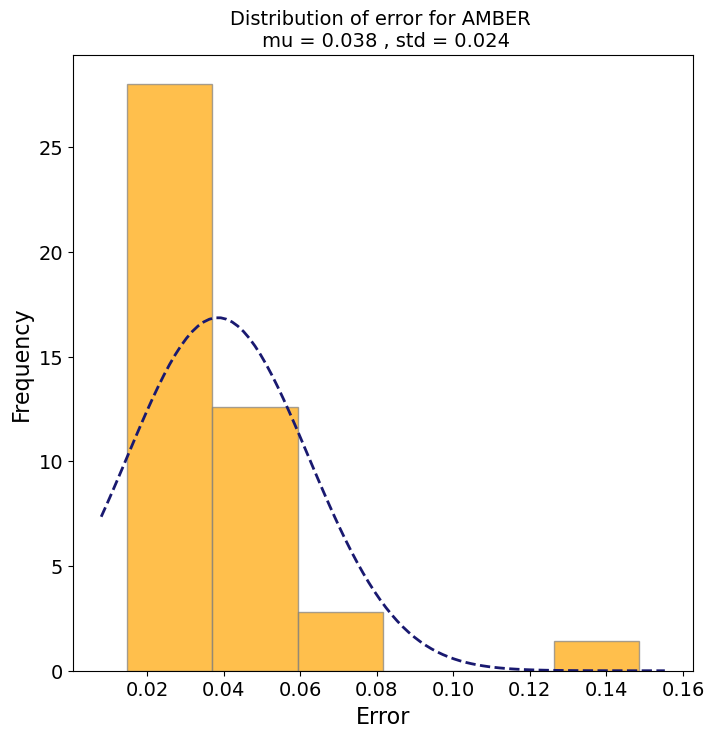

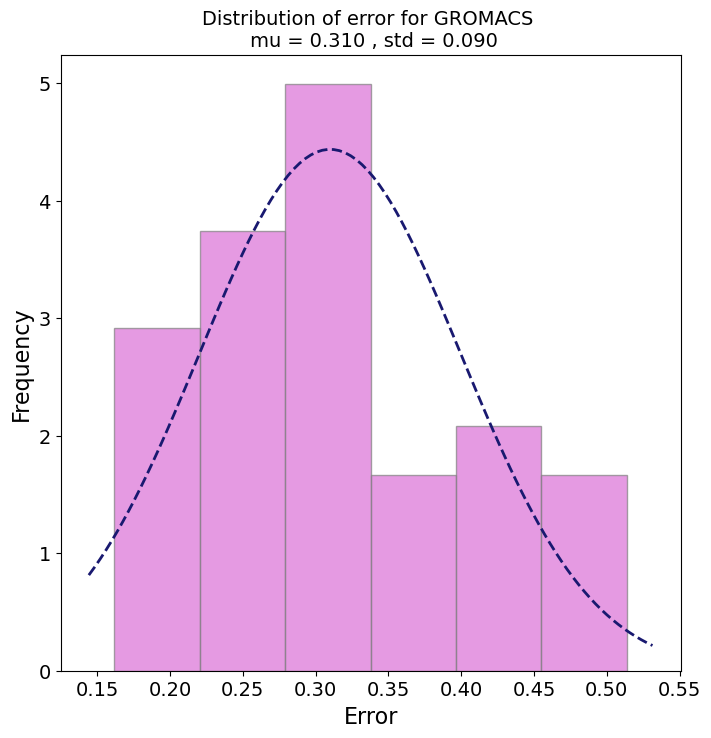

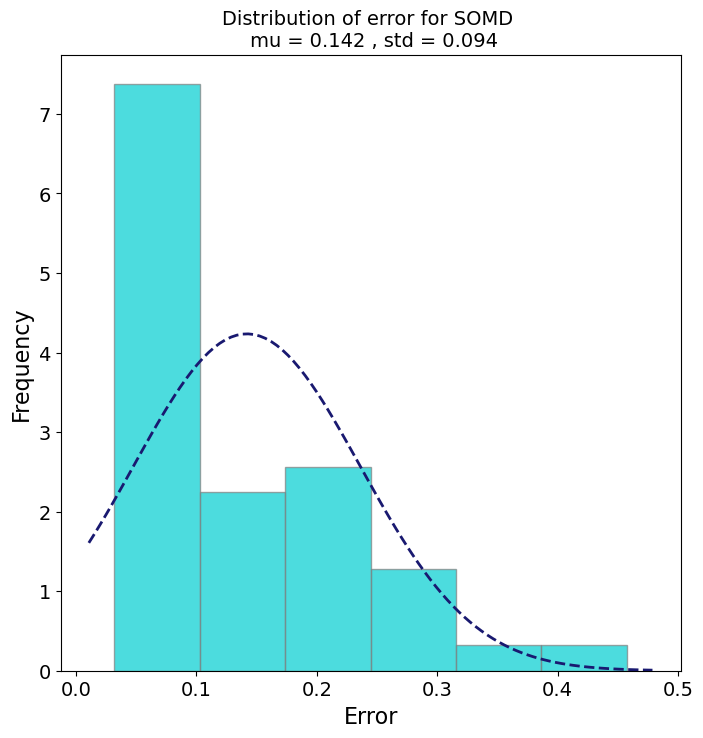

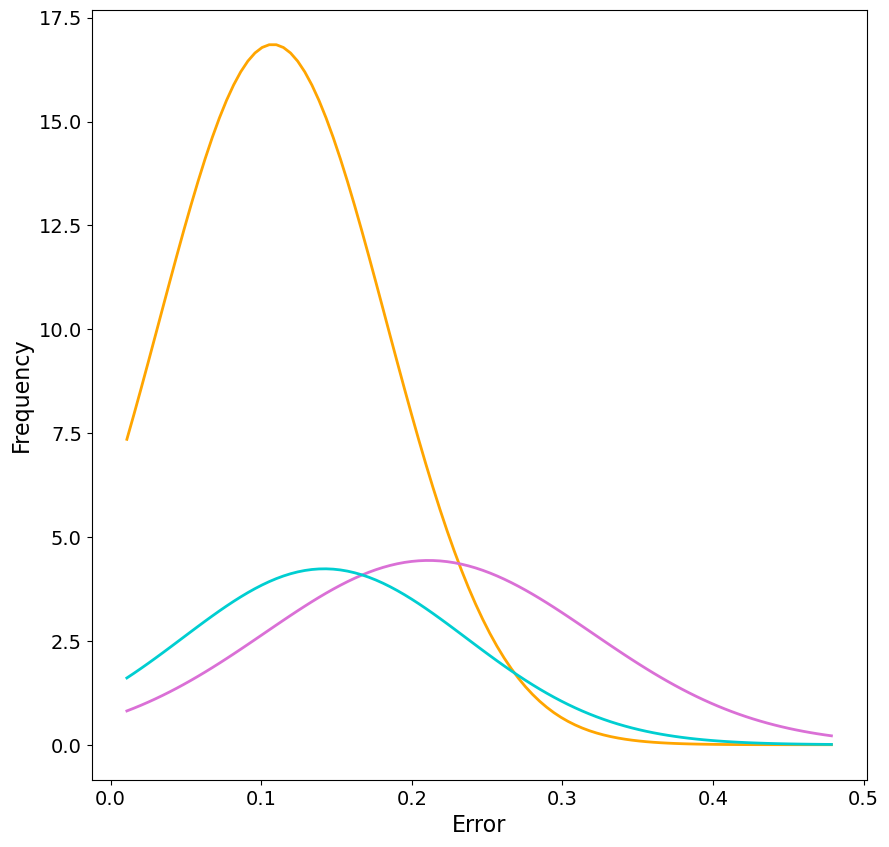

In [53]:

def histogram(engines=None, pert_val="pert", df=None):

    pert_val = validate.string(pert_val)
    if pert_val not in ["pert","val"]:
        raise ValueError("pert_val must be either 'pert' or 'val'")

    # if engines:
    #     engines = self._plotting_engines(engines)
    # # if no engines provided, use the defaults that were set based on the analysis object
    # else:
    #     engines = self.engines

    best_fit_dict = {}

    for eng in engines:

        # set plot defaults
        plt.rc('font', size=12)
        fig, ax = plt.subplots(figsize=(8,8))
        # col = self.colours[eng]
        col = plot_ana.colours[eng]
    
        # freenrg_df_plotting = self.freenrg_df_dict[eng][pert_val].dropna()
        freenrg_df_plotting = df[eng][pert_val].dropna()
        x = freenrg_df_plotting["err_fep"]            

        # no_bins = int(len(freenrg_df_plotting["err_exp"])/8)
        no_bins = 6

        # Fit a normal distribution to the data
        # mean and standard deviation
        mu, std = norm.fit(x)
  
        # Plot the histogram.
        plt.hist(x, bins=no_bins, density=True, alpha=0.7, color=col, edgecolor="grey")
        
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        y = norm.pdf(x, mu, std)
        
        plt.plot(x, y, '--', linewidth=2, color=plot_ana.colours["experimental"])
        
        best_fit_dict.update({eng:y})

        #plot
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f"Distribution of error for {eng} \n mu = {mu:.3f} , std = {std:.3f}")
        # eng_name = self._get_eng_name(engines)
        # plt.savefig(f"{self.results_folder}/fep_vs_exp_histogram_{pert_val}_{self.file_ext}_{eng_name}.png", dpi=300, bbox_inches='tight')
        plt.show()

    fig, ax = plt.subplots(figsize=(10,10))
    
    #TODO some way to get x
    for eng in engines:
        plt.plot(x, best_fit_dict[eng], 'k', linewidth=2, color=plot_ana.colours[eng])

    plt.xlabel('Error')
    plt.ylabel('Frequency')  
    # plt.savefig(f"{self.results_folder}/fep_vs_exp_dormal_dist_{pert_val}_{self.file_ext}_all.png", dpi=300, bbox_inches='tight')
    plt.show()


histogram(engines=plot_ana.engines, df=plot_ana.freenrg_df_dict)

In [8]:
! ls /home/anna/Documents/code/test/results

/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/pty.py:85: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f54583b03a0>
  pid, fd = os.forkpty()
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/pty.py:85: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f55bd9bf640>
  pid, fd = os.forkpty()
analysis_network.png
computed_perturbations_average_test_AMBER.csv
computed_perturbations_average_test_GROMACS.csv
computed_perturbations_average_test_SOMD.csv
exp_data_tyk2.dat
fep_pert_results_table__AMBER.csv
fep_pert_results_table__GROMACS.csv
fep_pert_results_table__SOMD.csv
fep_val_results_table__AMBER.csv
fep_val_results_table__GROMACS.csv
fep_val_results_table__SOMD.csv
fep_vs_exp_barplot_val__GROMACS.png


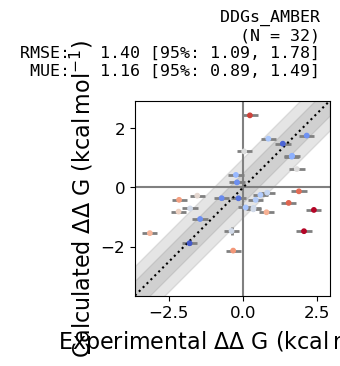

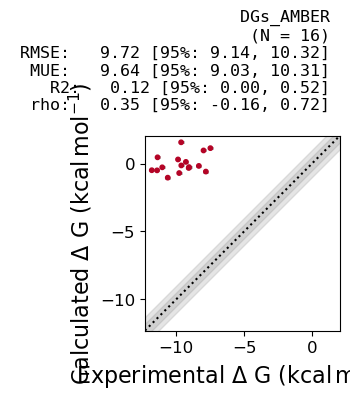

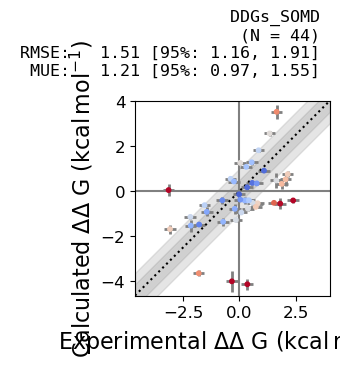

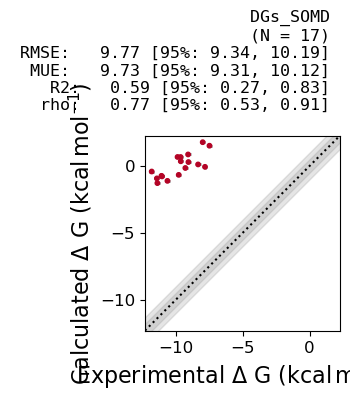

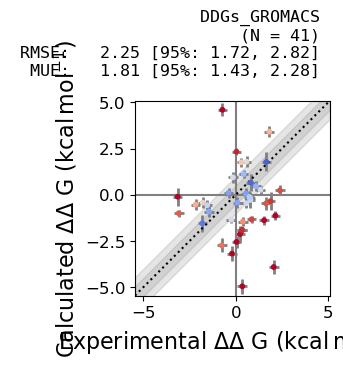

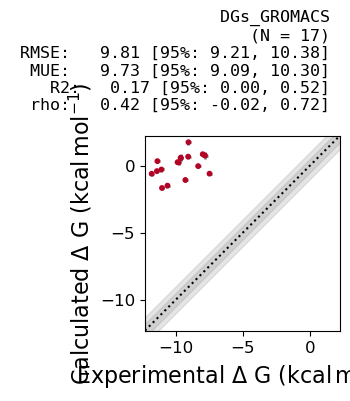

In [14]:
from cinnabar import wrangle,plotting


for eng in res_obj.engines:

    network = wrangle.FEMap(f"/home/anna/Documents/benchmark/tyk2_benchmark/outputs/cinnabar_{eng}.csv")
    # network.graph is the graph object
    # plot the perturbations
    plotting.plot_DDGs(network.graph, filename=f"DDGs_{eng}.png", title=f"DDGs_{eng}")
    #plot the ligands
    plotting.plot_DGs(network.graph, filename=f"DGs_{eng}.png", title=f"DGs_{eng}")

In [8]:
network.generate_graph_from_results()
network.n_edges

32

In [ ]:
    plotting.plot_DDGs(network.graph, filename=f"{res_folder}/DDGs_{file_ext_out}_{eng}.png", title=f"DDGs_{protein}_{file_ext_out}_{eng}")
    #plot the ligands
    plotting.plot_DGs(network.graph, filename=f"{res_folder}/DGs_{file_ext_out}_{eng}.png", title=f"DGs_{protein}_{file_ext_out}_{eng}")

In [ ]:
# for prot, net in it.product(["tyk2","p38","mcl1"],["rbfenn","lomap"]):

#     results_files = ["/home/anna/Documents/code/test/final_summary_SOMD_MBAR_alchemlyb_benchmark.csv"]
#     engine = "SOMD"
#     output_folder = "/home/anna/Documents/code/test"
#     net_file = f"/home/anna/Documents/benchmark/{prot}_benchmark/execution_model/network_{net}.dat"
#     weight_file = f"/home/anna/Documents/benchmark/{prot}_benchmark/execution_model/network_{net}_scores.dat"

#     perturbations, ligands, mod_results_files = get_info_network(results_files, net_file, extra_options={"engine":engine})

#     graph_x = graph(ligands, perturbations)
#     graph_x.add_weight(weight_file)
#     # graph_x.draw_graph()
#     avg_weighted = graph_x.get_average_weighted_simple_paths()
#     print(f"{prot} {net} is {avg_weighted}")

#     with open(f"{output_folder}/graph_{prot}_{net}.pickle", 'wb') as handle:
#         pickle.dump(graph_x.graph, handle)

# # cycles = graph.cycle_closures()
# # print(cycles)

# # nx.get_edge_attributes(graph_x.graph, "weight")

# # print(len(perturbations))


# # with open(f"{output_folder}/graph_tyk2_rbfenn.pickle", "rb") as file:
# #     graph_t = pickle.load(file)
# # print(type(graph_t))
# # nx.get_edge_attributes(graph_t, "weight")

In [ ]:
# import MDAnalysis
# from MDAnalysis.tests.datafiles import PSF,DCD,CRD
# u = MDAnalysis.Universe(PSF,DCD)
# ref = MDAnalysis.Universe(PSF,DCD)     # reference closed AdK (1AKE) (with the default ref_frame=0)
# #ref = MDAnalysis.Universe(PSF,CRD)    # reference open AdK (4AKE)

# import MDAnalysis.analysis.rms

# R = MDAnalysis.analysis.rms.RMSD(u, ref,
#            select="backbone",             # superimpose on whole backbone of the whole protein
#            groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
#                             "backbone and resid 122-159",                                   # LID
#                             "backbone and resid 30-59"])                                    # NMP
# R.run()

# import matplotlib.pyplot as plt
# rmsd = R.rmsd.T   # transpose makes it easier for plotting
# time = rmsd[1]
# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(111)
# ax.plot(time, rmsd[2], 'k-',  label="all")
# ax.plot(time, rmsd[3], 'k--', label="CORE")
# ax.plot(time, rmsd[4], 'r--', label="LID")
# ax.plot(time, rmsd[5], 'b--', label="NMP")
# ax.legend(loc="best")
# ax.set_xlabel("time (ps)")
# ax.set_ylabel(r"RMSD ($\AA$)")
# fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

In [ ]:
files